## Objectives

1. Sampling intro
2. Central Limit Theorem
3. T distributions
4. Confidence Intervals with T distributions

## Sampling

In statistics sampling is the selection of a subset (a statistical sample) of individuals from within a statistical population to estimate characteristics of the whole population. Two advantages of sampling are lower cost and faster data collection than measuring the entire population.

From each sample we get point estimates, estimates of the population parameters.
1. Each sample has its own unique mean
2. Plotting all the sample means results in a normal distribution 

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('titanic.csv')
print(len(df))
df.head()

887


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [2]:
df.Age.mean()

29.471443066516347

In [9]:
sample = df.sample(n=50, random_state=22) #Take a sample of 50 people
sample.Age.mean()

31.17

In [8]:
err = np.abs(sample.Age.mean() - df.Age.mean())
per_err = err / df.Age.mean()
print(per_err)

0.030525264681471077


In [18]:
sample_means = []
for i in range(100):
    sample = df.sample(n=50, random_state=i) #Take a sample of 50 people
    sample_means.append(sample.Age.mean()) #Calculate the sample mean

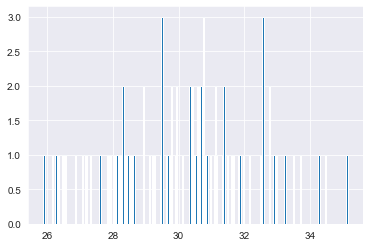

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid') #Pretty background including grid lines for our backdrop
plt.hist(sample_means, bins=250);

In [12]:
import numpy as np
np.mean(sample_means)

29.520729080000002

In [13]:
population_mean = df.Age.mean()
mean_sample_means = np.mean(sample_means)
acc = 1 - (np.abs(mean_sample_means - population_mean) / population_mean)
print(acc)

0.9983276688090088


## Central Limit Theorem

In probability theory, the central limit theorem establishes that, in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed.

Central Limit Theorem helps us identify if there is something different going on in a certain sample.   

30 samples is generally where Central Limit Theorem starts to kick in

Good visualization: http://mfviz.com/central-limit/

## Confidence Intervals

A Confidence Interval is a range of values above and below the point estimate that captures the true population parameter at some predetermined confidence level. If we want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence.

We calculate a confidence interval by taking a point estimate and then adding and subtracting a margin of error to create a range. Margin of error is based on your desired confidence level, the spread of the data and the size of your sample. The way you calculate the margin of error depends on whether you know the standard deviation of the population or not.

the margin of error for a known population stadard deviation is:

** Margin of Error = z ∗ σ / √n**

Where σ (sigma) is the population standard deviation, n is sample size, and z is a number known as the z-critical value.



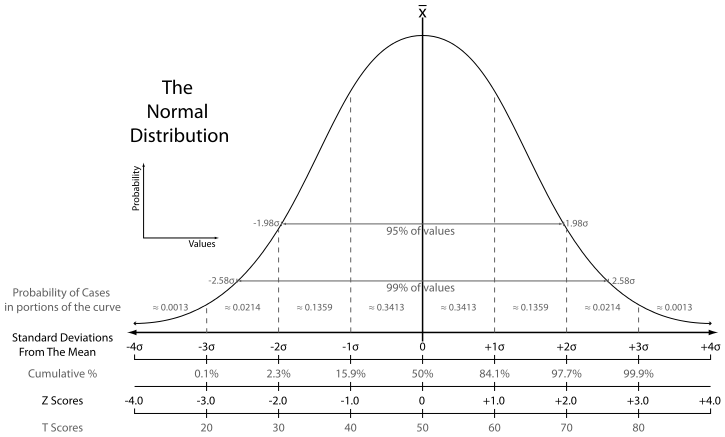

## Interpreting the Confidence Interval

There are two interpretations we can derive and one of them is wrong.

Interpretation 1 (incorrect):

There is a 95% probability that the mean voter age is between 41.6 and 43.9.

Interpretation 2 (correct):

If we pulled 100 samples and constructed confidence intervals in the same manner, we expect that 95 of the intervals would contain the true mean of population age.

Why is interpretation 1 wrong? It assigns a probability to the true value. In Frequentist statistics, the true value is fixed and the data is random. Confidence intervals make a statement of probability about the confidence interval range that could contain the true value.

## Extra Resources

1. **Great Video on Central limit theorem:** https://www.khanacademy.org/math/ap-statistics/sampling-distribution-ap/sampling-distribution-mean/v/central-limit-theorem
2. **Good desciption of Central limit theorem**: https://www.investopedia.com/terms/c/central_limit_theorem.asp